In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [69]:
def data_generator(sample,features, noise):
    np.random.seed(10)
    X = np.random.rand(sample, features)
    w = np.random.rand(features)
    b = 10
    y = np.dot(X, w) + b + (np.random.rand(sample) * noise) 
    return X, y
X , y = data_generator(sample = 100, features = 1, noise = 0.1)

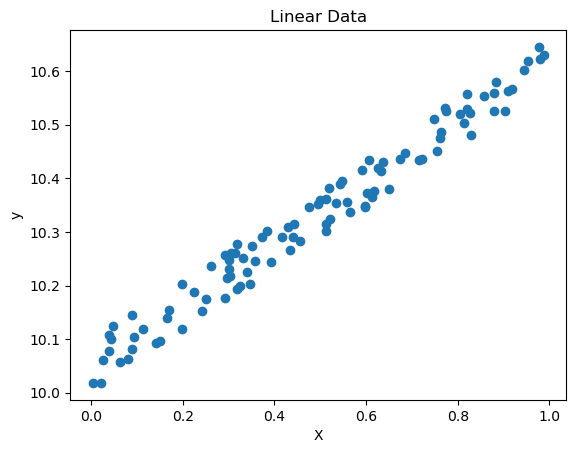

In [70]:
plt.scatter(X, y)
plt.title('Linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Model class and utility functions 

In [71]:
class LinearRegression:
    def __init__(self, n_iter, lr):
        self.n_iter = n_iter
        self.lr = lr
        self.w = None
        self.b = None

    def fit(self, X, y):
        samples, features = X.shape
        self.w = np.zeros(features)
        self.b = 0
        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.w) + self.b
            error = y_pred - y

            dw = (1/samples) * np.dot(X.T , error)
            db = (1/samples) * np.sum(error)

            self.w -= dw * self.lr
            self.b -= db * self.lr

    def predict(self, X):
        y = np.dot(X, self.w) + self.b
        return y

def shuffle_data(X, y, seed = None):
    if seed is not None:
        np.random.seed(seed)
    index = np.arange(len(X))
    np.random.shuffle(index)
    return X[index], y[index]

def train_test_split(X, y , ratio, shuffle = False, seed = False):
    if not 0 <= ratio <= 1:
        raise ValueError("`ratio` must be between 0 and 1.")
    if shuffle:
        X, y = shuffle_data(X,y, seed)
    divider = int(len(X) * ratio)
    train_X = X[: divider]
    test_X = X[divider: ]
    train_y = y[: divider]
    test_y = y[divider: ]
    return train_X, train_y, test_X, test_y

def mean_squared_error(y_true, y_pred):
    mse = np.mean(np.power(y_true - y_pred, 2))
    return mse

# model execution

In [72]:
train_X, train_y, test_X, test_y = train_test_split(X, y , 0.7, shuffle = True, seed = 42)
model = LinearRegression(lr = 0.1, n_iter = 1000)
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print('MSE : ', mean_squared_error(test_y, predictions))

MSE :  0.0009134489983161296


## Prediction vs Actual plot

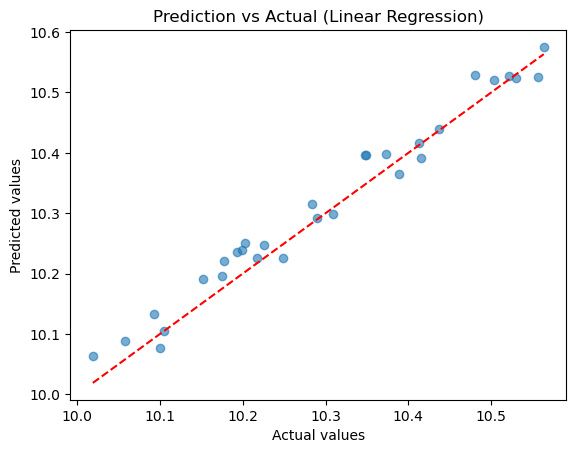

In [73]:
plt.figure()
plt.scatter(test_y, predictions, alpha=0.6)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color="red", linestyle="--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Prediction vs Actual (Linear Regression)")
plt.show()